In [1]:
import os, sys
print(os.listdir('../../'))
print(os.getcwd())
sys.path.append("../")
sys.path.append("../src/network")
sys.path.append("../src")
print(os.getcwd())
import torch
import glob
from torch import optim
import numpy as np
from src.data.tokenizer import Tokenizer
import string
import os, sys
import torch.utils.data as D
import cv2
import numpy as np
from torchvision import transforms
from src.network.gen_model.gen_model import GenModel_FC
from torchvision.transforms import v2
from random import choices
import kornia as K
import kornia.feature as KF
from kornia_moons.viz import *
from src.data.data_loader import RIMES_data
from src.data.reader import read_rimes
import random
import matplotlib.pyplot as plt
from src.network.losses import Loss

['data', 'handwriting-recognition', 'htr_self_supervised', 'manuscript-dating-sn', 'mnist_pipeline', 'Paper-ext', 'self-supervised-mnist', 'Thesis', 'ws-siamese']
c:\Users\Lisa\Documents\GitHub\handwriting-recognition\small_experiments
c:\Users\Lisa\Documents\GitHub\handwriting-recognition\small_experiments


In [2]:
charset_base = string.ascii_lowercase + string.ascii_uppercase
max_text_length = 25
tokenizer = Tokenizer(chars=charset_base, max_text_length=max_text_length, self_supervised=1)

In [3]:
gen_model = GenModel_FC(tokenizer.maxlen, tokenizer.vocab_size, tokenizer.PAD).cuda()
gen_model.load_state_dict(torch.load('../src/network/gen_model/gen_model.model')) #load
gen_model.eval()

GenModel_FC(
  (enc_image): RecursiveScriptModule(
    original_name=ImageEncoder
    (model): RecursiveScriptModule(
      original_name=VGG
      (features): RecursiveScriptModule(
        original_name=Sequential
        (0): RecursiveScriptModule(original_name=Conv2d)
        (1): RecursiveScriptModule(original_name=InstanceNorm2d)
        (2): RecursiveScriptModule(original_name=ReLU)
        (3): RecursiveScriptModule(original_name=Conv2d)
        (4): RecursiveScriptModule(original_name=InstanceNorm2d)
        (5): RecursiveScriptModule(original_name=ReLU)
        (6): RecursiveScriptModule(original_name=Conv2d)
        (7): RecursiveScriptModule(original_name=InstanceNorm2d)
        (8): RecursiveScriptModule(original_name=ReLU)
        (9): RecursiveScriptModule(original_name=Conv2d)
        (10): RecursiveScriptModule(original_name=InstanceNorm2d)
        (11): RecursiveScriptModule(original_name=ReLU)
        (12): RecursiveScriptModule(original_name=MaxPool2d)
        (13):

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
input_size = (64, 216, 1)
num_style_imgs = 15 # num imgs for generator to extract style from
batch_size = 32
dataset = "iam"
dataset_path = os.path.join("..", "data", dataset, "words")
max_word_len = 10

In [6]:
data_train, data_valid, data_test, wid_train, wid_valid, wid_test = read_rimes(dataset_path, max_word_len)

train
number of words in train: 20552
number of wids in train: 499
Number of words per word length
2 4301
3 5306
4 4147
5 2841
6 2128
7 1829
valid
number of words in valid: 6112
number of wids in valid: 499
Number of words per word length
2 1281
3 1605
4 1264
5 808
6 637
7 517
test
number of words in test: 4892
number of wids in test: 499
Number of words per word length
2 1028
3 1288
4 984
5 663
6 495
7 434


In [7]:
data_train = RIMES_data(data_train, input_size=input_size, tokenizer=tokenizer, num_images=num_style_imgs, wids=wid_train)
# train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=4)


In [8]:
loss_class = Loss("vgg", tokenizer, device, 9)

c:\Users\Lisa\miniconda3\envs\python_310_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Lisa\miniconda3\envs\python_310_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
)


He
to
he
of
of
de
in
to
of
it
as
my
so
in
in
of
of
be
It
of
he
It
to
in
he
He
me
of
he
or
go
of
of
to
go
is
ne
on
to
on
is
of
of
in
to
he
no
on
to
be
the
and
the
THE
the
and
the
the
the
was
and
how
the
and
who
and
and
had
had
The
had
two
and
the
sat
who
the
man
him
but
and
you
but
the
the
the
the
our
the
the
and
for
was
too
the
the
was
and
and
the
less
swim
hand
them
good
last
view
high
seem
slow
akin
were
hair
lets
free
West
that
well
rise
back
peel
life
joke
that
just
edge
made
held
They
real
This
that
gets
tilt
went
cuts
left
know
long
Next
join
some
that
will
with
back
time
than
once
that
skirt
Books
these
which
which
would
quest
which
likes
occur
great
grasp
Paris
cover
gives
might
aired
first
after
clock
means
Mixed
Jacob
first
plane
first
smell
again
would
basis
proof
every
House
truth
banks
sites
aware
first
trial
glass
tough
doing
party
catch
their
walls
quite
marry
whole
never
except
deeper
demand
should
people
fairly
Mercer
highly
always
snugly
retire
Orsini
simple
sedate
St

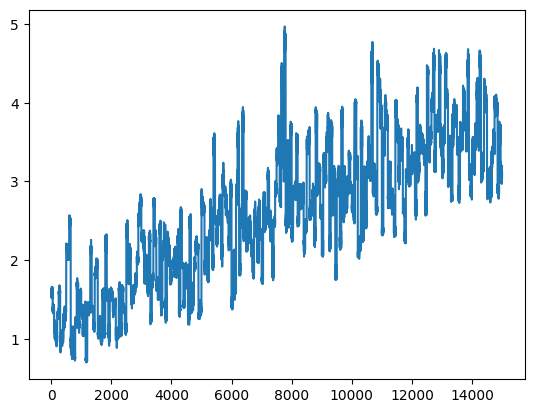

In [20]:
losses = []
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.random.seed(41)

for num_char in range(2, 8):

    for j in range(50):
        img_idx = np.random.randint(len(data_train.img_paths))
        img, gen_input, gt_label = data_train.__getitem__(img_idx)

        while len(tokenizer.decode(gt_label)) != num_char:
                img_idx = np.random.randint(len(data_train.img_paths))
                img, gen_input, gt_label = data_train.__getitem__(img_idx)
        
        # print(tokenizer.decode(gt_label))
        synth_imgs = []

        for i in range(50):
            img, gen_input, gt_label = data_train.__getitem__(img_idx)

            label = torch.from_numpy(np.array(gt_label)).cuda().long()
            label = torch.nn.functional.one_hot(label, 56).float()

            gen_input = torch.from_numpy(gen_input).squeeze(1).unsqueeze(0).cuda()

            synth_img = gen_model(gen_input, label.unsqueeze(0))

            img = img.cuda()

            loss = loss_class.loss_func(synth_img, img).detach().cpu()

            # synth_imgs.append(synth_img[0][0].detach().cpu())
            losses.append(loss)
    
    

    # plt.imshow(img[0].cpu())
    # plt.show()

    # fig, axs = plt.subplots(10, 5, figsize=(10, 10))

    # # Flatten the axs array to iterate over all subplots
    # axs = axs.flatten()

    # for z in range(len(synth_imgs)):
    #     # Plot image
    #     axs[z].imshow(synth_imgs[z], cmap='gray')
    #     axs[z].axis('off')  # Turn off axis
    

    # plt.tight_layout()
    # plt.show()
plt.plot(losses)
plt.show()
    
